<a href="https://colab.research.google.com/github/bksat90kc/KaggleChallenge/blob/main/KaggleChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install pdpbox
# !pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython
# !pip install shap

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import shap
import warnings
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pdpbox import pdp
from alepython import ale_plot
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

warnings.filterwarnings('ignore')

In [ ]:
# URL's for test and train data
train_url = 'https://raw.githubusercontent.com/bksat90kc/KaggleChallenge/main/train.csv'
test_url = 'https://raw.githubusercontent.com/bksat90kc/KaggleChallenge/main/test.csv'

**1. Loading Data**

In [ ]:
# read the train data
train_df = pd.read_csv(train_url)

In [ ]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
# read the test data
test_df = pd.read_csv(test_url)

In [ ]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
# extract the cabin details
train_df[['Deck', 'CabinNum', 'Side']] = train_df['Cabin'].str.split('/', expand=True)

# extract the cabin details
test_df[['Deck', 'CabinNum', 'Side']] = test_df['Cabin'].str.split('/', expand=True)

**2. EDA**

<Axes: >

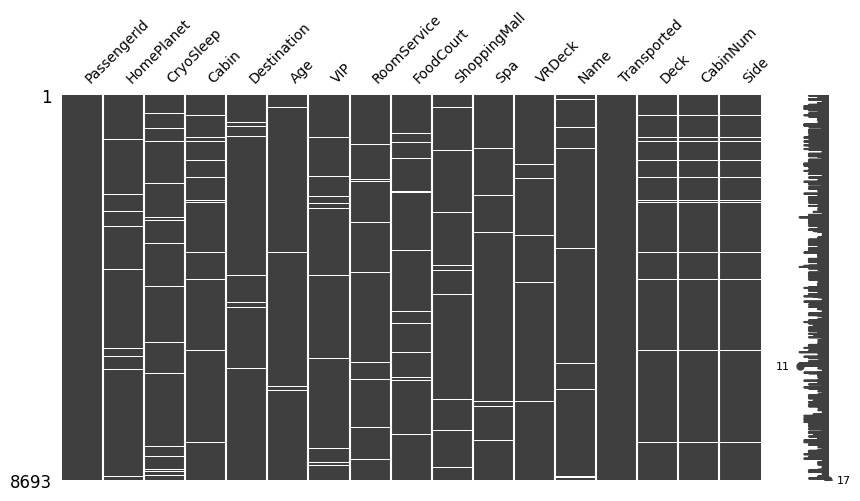

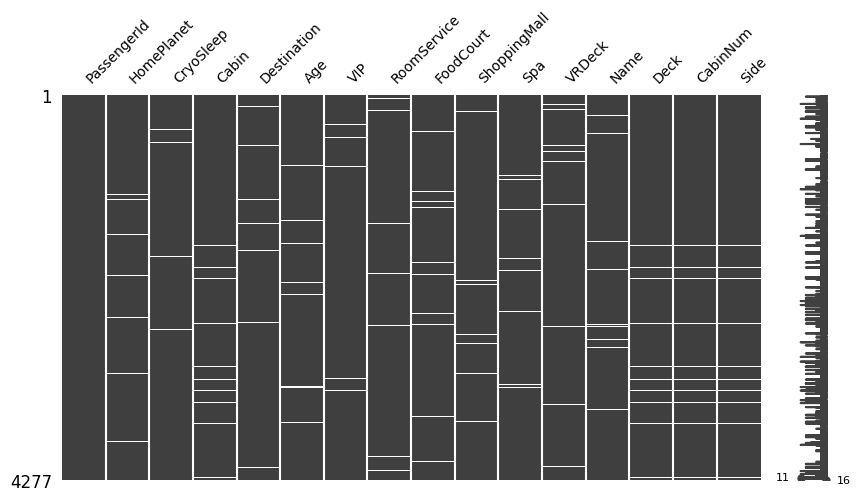

In [ ]:
# Show missing values
msno.matrix(train_df,figsize=(10,5),fontsize=10)
msno.matrix(test_df,figsize=(10,5),fontsize=10)

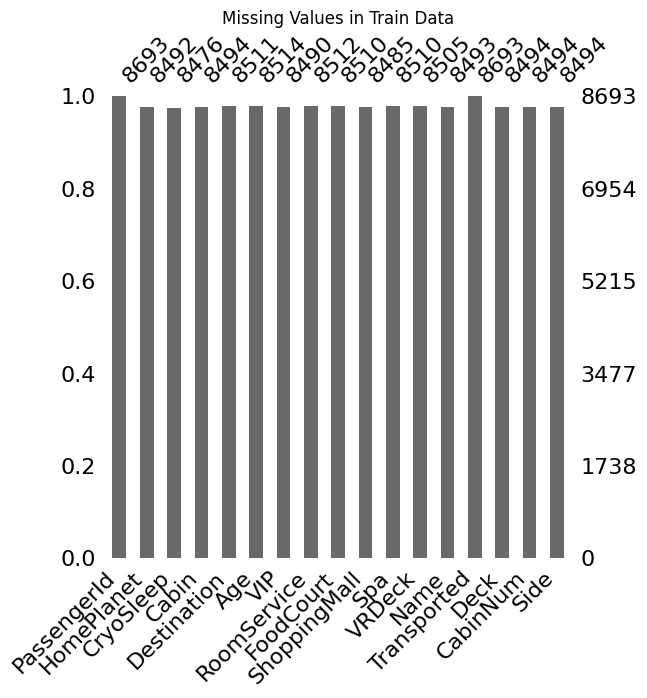

In [ ]:
# showing missing values in bar plot (training data)
msno.bar(train_df, figsize=(6, 6))
plt.title('Missing Values in Train Data')
plt.show()

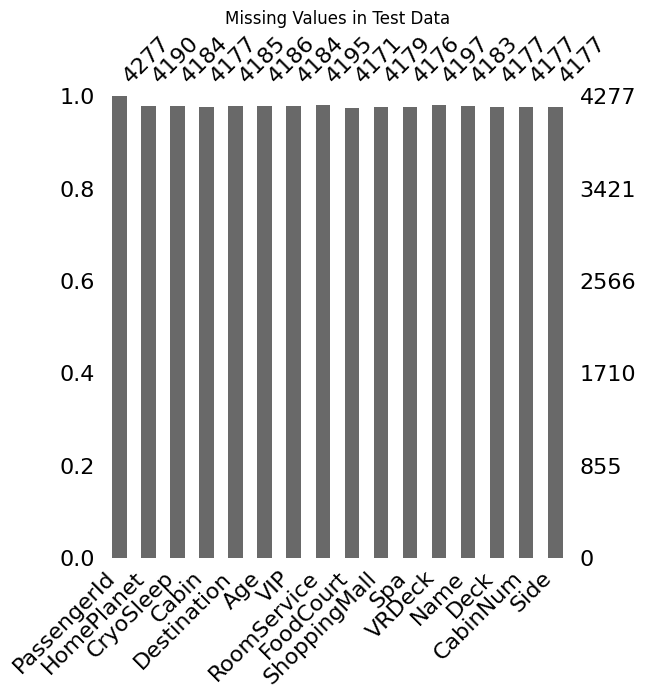

In [ ]:
# showing missing values in bar plot (test data)
msno.bar(test_df, figsize=(6, 6))
plt.title('Missing Values in Test Data')
plt.show()

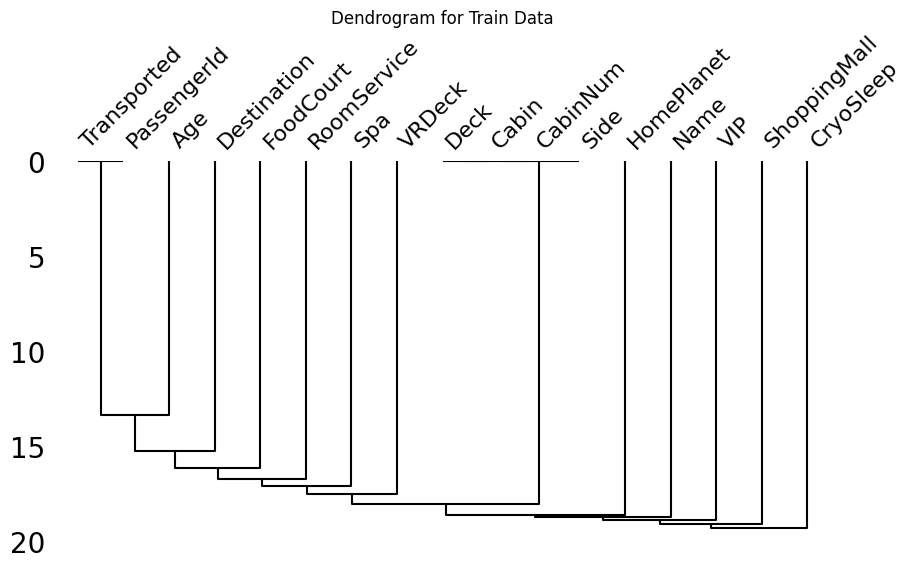

In [ ]:
# Dendrogram for training data
msno.dendrogram(train_df, figsize=(10, 5))
plt.title('Dendrogram for Train Data')
plt.show()

In [ ]:
# pie chart

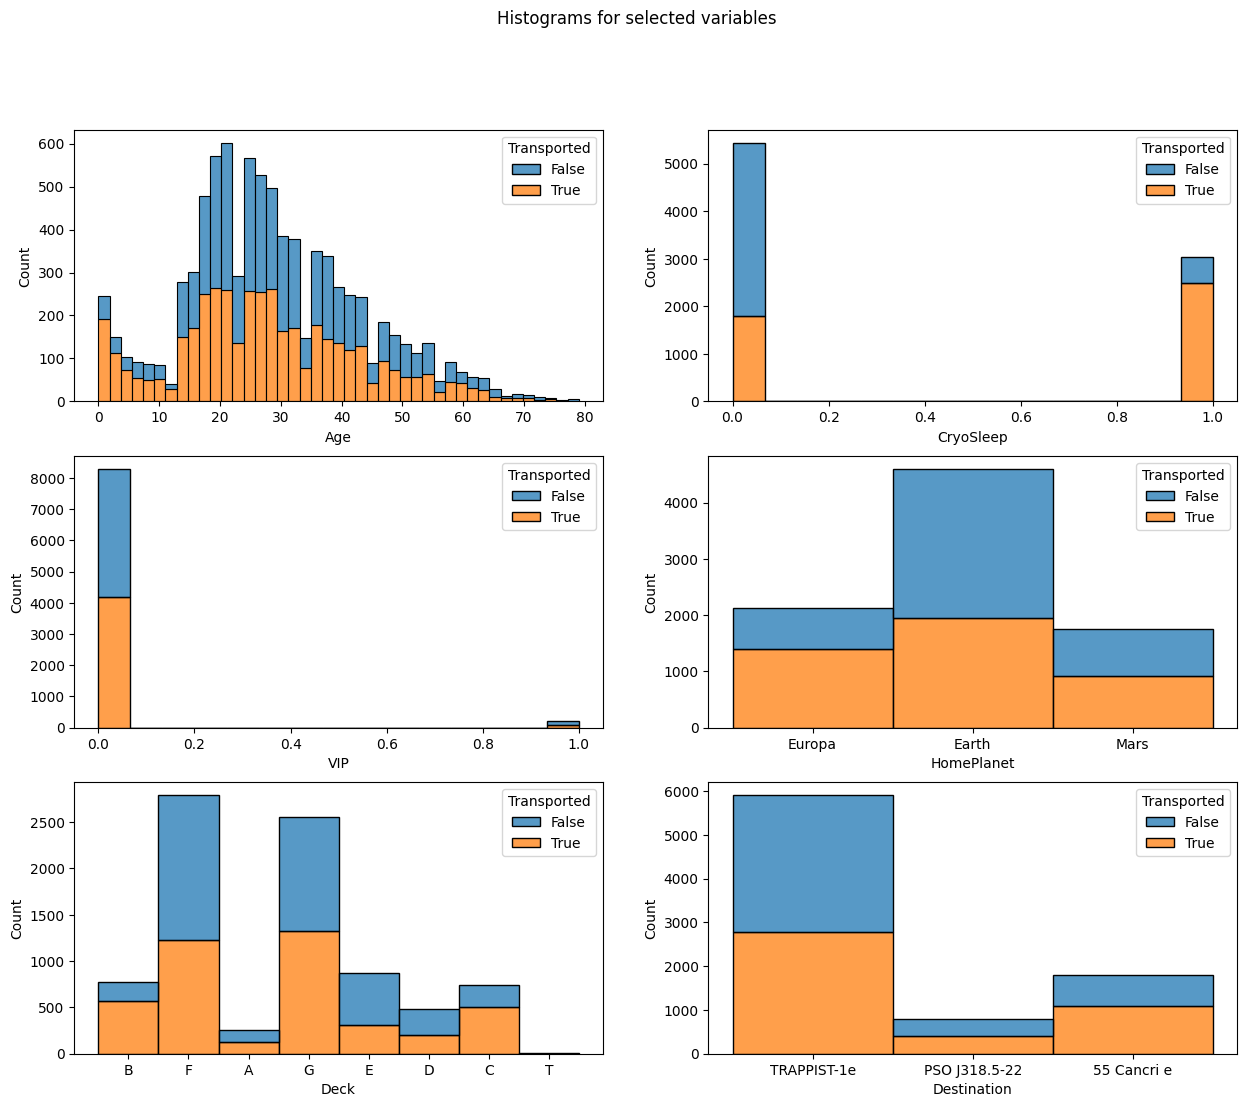

In [ ]:
# Histogram plots
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

sns.histplot(x='Age', data=train_df, hue='Transported', ax=axs[0, 0], multiple="stack")
sns.histplot(x='CryoSleep', data=train_df, hue='Transported', ax=axs[0, 1], multiple="stack")
sns.histplot(x='VIP', data=train_df, hue='Transported', ax=axs[1, 0], multiple="stack")
sns.histplot(x='HomePlanet', data=train_df, hue='Transported', ax=axs[1, 1], multiple="stack")
sns.histplot(x='Deck', data=train_df, hue='Transported', ax=axs[2, 0], multiple="stack")
sns.histplot(x='Destination', data=train_df, hue='Transported', ax=axs[2, 1], multiple="stack")

axs[0, 0].set(ylabel='Count')
axs[0, 1].set(ylabel='Count')
axs[1, 0].set(ylabel='Count')
axs[1, 1].set(ylabel='Count')
axs[2, 0].set(ylabel='Count')
axs[2, 1].set(ylabel='Count')

fig.suptitle('Histograms for selected variables')
plt.show()

In [ ]:
swarm_data = train_df.dropna()#
swarm_data = swarm_data.head(2000)

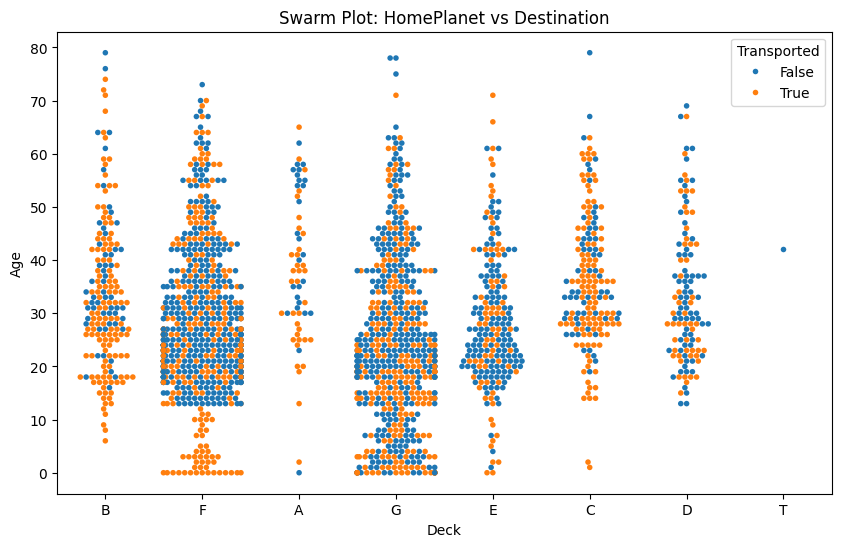

In [ ]:
# Swarm plot for HomePlanet and Destination
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Deck', y='Age', hue='Transported', data=swarm_data, size=4)
plt.title('Swarm Plot: HomePlanet vs Destination')
plt.show()

In [ ]:
# Tree plot
tree_data = train_df.dropna()
fig = px.treemap(tree_data, path=['Transported', 'HomePlanet', 'Destination', 'Deck', 'CryoSleep'])
fig.show()

**3. Data Pre-Processing**

3.1 Pre-Processing Train Data

In [ ]:
train_df.drop(['CabinNum'], axis=1, inplace=True)

In [ ]:
# dataframe information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Deck          8494 non-null   object 
 15  Side          8494 non-null   object 
dtypes: bool(1), float64(6), object(9)
memory usage: 1.0+ MB


In [ ]:
# dataframe information
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
# replace NaN values in dataframe
values = {'HomePlanet': 'unknown', 'CryoSleep': 0, 'CabinNum': 0,
          'Destination': 'unknown', 'VIP': 'False', 'RoomService': 0,
          'FoodCourt': 0, 'ShoppingMall': 0, 'Spa':0, 'VRDeck': 0, 'Side': 'Unknown'}
train_df.fillna(value=values, inplace=True)

In [ ]:
# # label encoding for Deck
# lab_enc = LabelEncoder()
# lab_enc.fit(train_df['Deck'])
# train_df['Deck'] = lab_enc.transform(train_df['Deck'])
# train_df['Deck'].unique()

In [ ]:
# average imputation
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)

In [ ]:
# one hot encoding for HomePlanet, Destination, Deck, and Side
oh1 = OneHotEncoder()
oh1.fit(train_df[['HomePlanet', 'Destination', 'Deck', 'Side']])

OneHotEncoder()

In [ ]:
# categories in HomePlanet
oh1.categories_

[array(['Earth', 'Europa', 'Mars', 'unknown'], dtype=object),
 array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', 'unknown'],
       dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', nan], dtype=object),
 array(['P', 'S', 'Unknown'], dtype=object)]

In [ ]:
# transform the one hot encoder object for train data
oh_train = oh1.transform(train_df[['HomePlanet', 'Destination',
                                   'Deck', 'Side']]).toarray()

In [ ]:
# shape of the output
print('Shape of one-hot encoded HomePlanet data:', oh_train.shape)

Shape of one-hot encoded HomePlanet data: (8693, 20)


In [ ]:
oh_train

array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [ ]:
# new transformed data for the HomePlanet
oh_train_df = pd.DataFrame(oh_train, columns=['Earth', 'Europa', 'Mars', 'UnSrc',
                                           '55 Cancri e', 'PSO J318.5-22',
                                           'TRAPPIST-1e', 'UnDes', 'Deck_A',
                                           'Deck_B', 'Deck_C', 'Deck_D',
                                           'Deck_E', 'Deck_F', 'Deck_G',
                                           'Deck_T', 'Deck_Unk', 'Side_P', 'Side_S', 'Side_Unk'])
oh_train_df.head()

,Earth,Europa,Mars,UnSrc,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,UnDes,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unk,Side_P,Side_S,Side_Unk
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# concatenating two dataframes
train_df = pd.concat([train_df, oh_train_df], axis=1, join='inner')

In [ ]:
# convert Transported column to numeric values : 0 for False and 1 for True
train_df.loc[train_df["Transported"] == False, "Transported"] = 0
train_df.loc[train_df["Transported"] == True, "Transported"] = 1

# convert VIP column to numeric values : 0 for False and 1 for True
train_df.loc[train_df["VIP"] == False, "VIP"] = 0
train_df.loc[train_df["VIP"] == 'False', "VIP"] = 0
train_df.loc[train_df["VIP"] == True, "VIP"] = 1

# convert CryoSleep column to numeric values : 0 for False and 1 for True
train_df.loc[train_df["CryoSleep"] == False, "CryoSleep"] = 0
train_df.loc[train_df["CryoSleep"] == 'False', "CryoSleep"] = 0
train_df.loc[train_df["CryoSleep"] == True, "CryoSleep"] = 1

In [ ]:
# convert the data type to integer
columns = ['CryoSleep', 'Transported', 'VIP', 'Earth', 'Europa', 'Mars',
           'UnSrc', '55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', 'UnDes',
           'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
           'Deck_T', 'Deck_Unk', 'Side_P', 'Side_S', 'Side_Unk']

for col in columns:
  train_df[col] = train_df[col].astype('int64')

In [ ]:
# Change the index to PassengerId
train_df.index = train_df['PassengerId']

In [ ]:
train_df.drop(['HomePlanet', 'Destination', 'Cabin',
               'PassengerId', 'Deck', 'Side', 'Name'], axis=1, inplace=True)

In [ ]:
# extract required train data
X_train = train_df.drop('Transported', axis=1)
y_train = train_df[['Transported']]

In [ ]:
X_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unk,Side_P,Side_S,Side_Unk
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,1,0,0
0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,...,0,0,0,1,0,0,0,0,1,0
0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,...,0,0,0,0,0,0,0,0,1,0
0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,...,0,0,0,0,0,0,0,0,1,0
0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
columns = X_train.columns
for col in columns:
  check_nan = train_df[col].isnull().values.any()
  print(col, check_nan)

CryoSleep False
Age False
VIP False
RoomService False
FoodCourt False
ShoppingMall False
Spa False
VRDeck False
Earth False
Europa False
Mars False
UnSrc False
55 Cancri e False
PSO J318.5-22 False
TRAPPIST-1e False
UnDes False
Deck_A False
Deck_B False
Deck_C False
Deck_D False
Deck_E False
Deck_F False
Deck_G False
Deck_T False
Deck_Unk False
Side_P False
Side_S False
Side_Unk False


3.2 Pre-Processing Test Data

In [ ]:
test_df.drop(['CabinNum'], axis=1, inplace=True)

In [ ]:
# replace NaN values in dataframe
values = {'HomePlanet': 'unknown', 'CryoSleep': 0,
          'Destination': 'unknown', 'VIP': 'False', 'RoomService': 0,
          'FoodCourt': 0, 'ShoppingMall': 0, 'Spa':0, 'VRDeck': 0, 'Side': 'unknown'}
test_df.fillna(value=values, inplace=True)

In [ ]:
# # label encoding for Deck
# test_df['Deck'] = lab_enc.transform(test_df['Deck'])
# test_df['Deck'].unique()

In [ ]:
# average imputation
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)

In [ ]:
# one hot encoding for test data
oh2 = OneHotEncoder()
oh2.fit(test_df[['HomePlanet', 'Destination', 'Deck', 'Side']])

OneHotEncoder()

In [ ]:
# categories in HomePlanet
oh2.categories_

[array(['Earth', 'Europa', 'Mars', 'unknown'], dtype=object),
 array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', 'unknown'],
       dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', nan], dtype=object),
 array(['P', 'S', 'unknown'], dtype=object)]

In [ ]:
# transform the one hot encoder object for train data
oh_test = oh2.transform(test_df[['HomePlanet', 'Destination',
                                   'Deck', 'Side']]).toarray()

In [ ]:
# shape of the output
print('Shape of one-hot encoded HomePlanet data:', oh_test.shape)

Shape of one-hot encoded HomePlanet data: (4277, 20)


In [ ]:
oh_test

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [ ]:
# new transformed test data
oh_test_df = pd.DataFrame(oh_test, columns=['Earth', 'Europa', 'Mars', 'UnSrc',
                                           '55 Cancri e', 'PSO J318.5-22',
                                           'TRAPPIST-1e', 'UnDes', 'Deck_A',
                                           'Deck_B', 'Deck_C', 'Deck_D',
                                           'Deck_E', 'Deck_F', 'Deck_G',
                                           'Deck_T', 'Deck_Unk', 'Side_P', 'Side_S', 'Side_Unk'])
oh_test_df.head()

,Earth,Europa,Mars,UnSrc,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,UnDes,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unk,Side_P,Side_S,Side_Unk
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# concatenating two dataframes
test_df = pd.concat([test_df, oh_test_df], axis=1, join='inner')

In [ ]:
# convert VIP column to numeric values : 0 for False and 1 for True
test_df.loc[test_df["VIP"] == False, "VIP"] = 0
test_df.loc[test_df["VIP"] == 'False', "VIP"] = 0
test_df.loc[test_df["VIP"] == True, "VIP"] = 1


# convert CryoSleep column to numeric values : 0 for False and 1 for True
test_df.loc[test_df["CryoSleep"] == False, "CryoSleep"] = 0
test_df.loc[test_df["CryoSleep"] == 'False', "CryoSleep"] = 0
test_df.loc[test_df["CryoSleep"] == True, "CryoSleep"] = 1

In [ ]:
# convert the data type to integer
columns = ['CryoSleep', 'VIP', 'Earth', 'Europa', 'Mars',
           'UnSrc', '55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', 'UnDes',
           'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
           'Deck_T', 'Deck_Unk', 'Side_P', 'Side_S', 'Side_Unk']

for col in columns:
  test_df[col] = test_df[col].astype('int64')


In [ ]:
# Change the index to PassengerId
test_df.index = test_df['PassengerId']

In [ ]:
test_df.drop(['HomePlanet', 'Destination', 'Cabin',
              'PassengerId', 'Deck', 'Side', 'Name'], axis=1, inplace=True)

In [ ]:
test_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unk,Side_P,Side_S,Side_Unk
PassengerId,,,,,,,,,,,,,,,,,,,,,
0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,1,0,0,0,1,0
0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,0,...,0,0,0,1,0,0,0,0,1,0
0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,1,...,1,0,0,0,0,0,0,0,1,0
0021_01,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,0,1,...,1,0,0,0,0,0,0,0,1,0
0023_01,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
columns = test_df.columns
for col in columns:
  check_nan = test_df[col].isnull().values.any()
  print(col, check_nan)

CryoSleep False
Age False
VIP False
RoomService False
FoodCourt False
ShoppingMall False
Spa False
VRDeck False
Earth False
Europa False
Mars False
UnSrc False
55 Cancri e False
PSO J318.5-22 False
TRAPPIST-1e False
UnDes False
Deck_A False
Deck_B False
Deck_C False
Deck_D False
Deck_E False
Deck_F False
Deck_G False
Deck_T False
Deck_Unk False
Side_P False
Side_S False
Side_Unk False


3.3. Data Transformation using StandardScaler

In [ ]:
# Standard Scaler for transformation
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
test_df_scaled = scaler.transform(test_df)

**4. Modelling**

Following Classification are conducted:


1.   Logistic Regression
2.   Random Forrest



In [ ]:
# logistic regression
lrcl = LogisticRegression()
lrcl.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# random forrest classifier
rfcl = RandomForestClassifier()
rfcl.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
# finding predictions for each algorithm
lr_y_pred = lrcl.predict(test_df_scaled)
rf_y_pred = rfcl.predict(test_df_scaled)

In [ ]:
# reshaping the predictions
lr_y_pred = lr_y_pred.reshape(-1, 1)
rf_y_pred = rf_y_pred.reshape(-1, 1)

In [ ]:
# creating the dataframes for the predictions
lr_pred_df = pd.DataFrame(lr_y_pred, columns=['Transported'])
rf_pred_df = pd.DataFrame(rf_y_pred, columns=['Transported'])

In [ ]:
lr_y_train_pred = lrcl.predict(X_train_scaled)
rf_y_train_pred = rfcl.predict(X_train_scaled)

**5. Performance Analysis**

In [ ]:
# performance result for logistic regression
print("Logistic Regression")
print("Accuracy Score:")
print(accuracy_score(y_train, lr_y_train_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_train, lr_y_train_pred))
print("Classification report:")
print(classification_report(y_train, lr_y_train_pred))

Logistic Regression
Accuracy Score:
0.7910962843667319
Confusion Matrix:
[[3338  977]
 [ 839 3539]]
Classification report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      4315
           1       0.78      0.81      0.80      4378

    accuracy                           0.79      8693
   macro avg       0.79      0.79      0.79      8693
weighted avg       0.79      0.79      0.79      8693



In [ ]:
# performance result for random forrest
print("Random Forrest")
print("Accuracy Score:")
print(accuracy_score(y_train, rf_y_train_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_train, rf_y_train_pred))
print("Classification report:")
print(classification_report(y_train, rf_y_train_pred))

Random Forrest
Accuracy Score:
0.9491544921200966
Confusion Matrix:
[[4003  312]
 [ 130 4248]]
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      4315
           1       0.93      0.97      0.95      4378

    accuracy                           0.95      8693
   macro avg       0.95      0.95      0.95      8693
weighted avg       0.95      0.95      0.95      8693



**6. XAI**

In [ ]:
# features = X_train.columns.tolist()
# partial_plot = pdp.PDPIsolate(model=rfcl,
#                               df=X_train,
#                               model_features=features,
#                               feature="CryoSleep",
#                               feature_name="CryoSleep",
#                               n_classes=0)

# fig, axes = partial_plot.plot(center=False, plot_lines=True, plot_pts_dist=True)
# fig

In [ ]:
# len(features)

In [ ]:
# X_train.head()

In [ ]:
# test_df.index = test_df['PassengerId']
# test_df.drop(['PassengerId'], axis=1, inplace=True)

In [ ]:
# test_df.head()

In [ ]:
# # X_train = train.drop('mpg', axis=1)
# ale_plot(rfcl, test_df, 'Age', monte_carlo="TRUE")

In [ ]:
# ale_plot(rfcl, test_df, 'CryoSleep', monte_carlo="TRUE")

In [ ]:
# ale_plot(rfcl, test_df, 'VIP', monte_carlo="TRUE")

In [ ]:
# explainer =shap.TreeExplainer(rfcl)
# shap_values = explainer.shap_values(test_df)

# shap.summary_plot(shap_values, test_df)

**7. Prepare predicitons for submission**

In [ ]:
test_df.reset_index(inplace=True)

In [ ]:
# creating the outcomes
lr_outcome_df = pd.concat([test_df[['PassengerId']], lr_pred_df], axis=1, join='inner')
rf_outcome_df = pd.concat([test_df[['PassengerId']], rf_pred_df], axis=1, join='inner')

In [ ]:
# convert Transported column to numeric values : 0 for False and 1 for True
lr_outcome_df.loc[lr_outcome_df["Transported"] == 0, "Transported"] = False
lr_outcome_df.loc[lr_outcome_df["Transported"] == 1, "Transported"] = True

rf_outcome_df.loc[rf_outcome_df["Transported"] == 0, "Transported"] = False
rf_outcome_df.loc[rf_outcome_df["Transported"] == 1, "Transported"] = True

In [ ]:
# save the outcomes into the files
lr_outcome_df.to_csv('lr_submission.csv', index=False)
rf_outcome_df.to_csv('rf_submission.csv', index=False)